In [1]:
#we will now register sebsequent volumes in the time series onto the binary volume from part 2
#it is critical the registration is good as filter pixels not effectively masked due to inaccuracy will be segmented as deposit

from PIL import Image, ImageChops
import math
import numpy as np
import imageio as io
from skimage import img_as_float
from skimage.metrics import mean_squared_error as mse
from skimage.util import crop

#first we need to make some 'registration volumes' from the full volume so that sitk can read vol w/o mem err
#for s in range(1, 17):
    #load = io.volread('E:/paper_2/Volumes_Bare/TiffSaver-tomo_B%d.tif'%(s))
    #crop = load[102:498, 302:498, 1002:1098]
    #io.volwrite('E:/paper_2/Volumes_Bare/Registration_vol_bare/TiffSaver-reg_B%d.tif'%(s), crop, format='tiff')

#load = io.volread('E:/paper_2/Volumes_Bare/Mask_TiffSaver_1.tif')
#crop = load[102:498, 302:498, 1002:1098]
#io.volwrite('E:/paper_2/Volumes_Bare/Registration_vol_bare/TiffSaver-reg_mask.tif', crop, format='tiff')

In [2]:
#function that calculates the root mean square error between im1 and im2
def rmsdiff(im1, im2):
    """Calculates the root mean square error (RSME) between two images"""
    return math.sqrt(mse(im1, im2))

#Loads and crops im1 and im2 for rmsdiff function
#loops im2 loader through t dimension in data series
im1 = io.volread('E:/paper_2/Volumes_Bare/Registration_vol_bare/TiffSaver-reg_mask.tif').astype('Float32')
for x in range(1, 17):
    im2 = io.volread('E:/paper_2/Volumes_Bare/Registration_vol_bare/TiffSaver-reg_B%d.tif'%(x)).astype('Float32')
    print(f"RMS of tomo %d = {rmsdiff(im1[2:398, 2:198, 2:98], im2[2:398, 2:198, 2:98])}"%(x))
print(im1[2:398, 2:198, 2:98].shape)

<ipython-input-2-bb03323250d9>:8: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  im1 = io.volread('E:/paper_2/Volumes_Bare/Registration_vol_bare/TiffSaver-reg_mask.tif').astype('Float32')
<ipython-input-2-bb03323250d9>:10: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  im2 = io.volread('E:/paper_2/Volumes_Bare/Registration_vol_bare/TiffSaver-reg_B%d.tif'%(x)).astype('Float32')


RMS of tomo 1 = 124.3000054136771
RMS of tomo 2 = 124.36287870862925
RMS of tomo 3 = 124.36316569710753
RMS of tomo 4 = 125.35422286395418
RMS of tomo 5 = 125.46255525177783
RMS of tomo 6 = 124.30898144038275
RMS of tomo 7 = 124.29651388270034
RMS of tomo 8 = 124.25832458281415
RMS of tomo 9 = 125.19493518458792
RMS of tomo 10 = 125.1927978427793
RMS of tomo 11 = 124.25489989259317
RMS of tomo 12 = 125.35740394219201
RMS of tomo 13 = 124.85847483656664
RMS of tomo 14 = 125.03548027674529
RMS of tomo 15 = 124.91118128772975
RMS of tomo 16 = 124.18258937313463
(394, 194, 94)


(394, 194, 94)


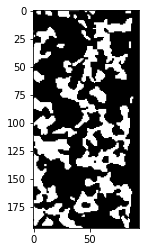

In [3]:
#to check we have analysed correct shape/image region
import matplotlib.pyplot as plt
print(im1[2:398, 2:198, 2:98].shape)
plt.imshow(im1[200, 2:198, 2:98], cmap = 'gray')

In [4]:
#that'll do
from __future__ import print_function
import SimpleITK as sitk
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from ipywidgets import interact, fixed

#the dimension of the image and the origin
dimension = 3
point = (1.0, 1.0, 1.0)
#this function will print where the origin will be translated to 
def transform_point(transform, point):
    transformed_point = transform.TransformPoint(point)
    print('Point ' + str(point) + ' transformed is ' + str(transformed_point))
#this function will visualises
def myshow(img, title=None, margin=0.05, dpi=80):
    nda = sitk.GetArrayViewFromImage(img)
    spacing = img.GetSpacing()    
    ysize = nda.shape[0]
    xsize = nda.shape[1]  
    figsize = (1 + margin) * ysize / dpi, (1 + margin) * xsize / dpi
    fig = plt.figure(title, figsize=figsize, dpi=dpi)
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])
    extent = (0, xsize*spacing[1], 0, ysize*spacing[0])
    t = ax.imshow(nda,
            extent=extent,
            interpolation='hamming',
            cmap='gray',
            origin='lower')
    if(title):
        plt.title(title)
#this function executes the resampling
def resample(image, transform):
    # Output image Origin, Spacing, Size, Direction are taken from the reference
    # image in this call to Resample
    reference_image = image
    interpolator = sitk.sitkNearestNeighbor
    default_value = 0
    return sitk.Resample(image, reference_image, transform,
                         interpolator, default_value)
moving_image = sitk.ReadImage("E:/paper_2/Volumes_Bare/Registration_vol_bare/TiffSaver-reg_B1.tif", sitk.sitkFloat32)
moving_image_cropped = moving_image[:, :, :] #2:398, 2:198, 2:98 but w/o +2 pad and x,y,z not z,y,x
translation = sitk.TranslationTransform(dimension)
translation.SetParameters((0.0, 0.0, 0.0))
translation.SetOffset((0.0, 0.0, 0.0))
transform_point(translation, point)
resampled = resample(moving_image_cropped, translation)

Point (1.0, 1.0, 1.0) transformed is (1.0, 1.0, 1.0)


In [5]:
fixed_image = sitk.ReadImage("E:/paper_2/Volumes_Bare/Registration_vol_bare/TiffSaver-reg_mask.tif", sitk.sitkFloat32)
fixed_image_cropped = fixed_image[:, :, :]
translation_0 = sitk.TranslationTransform(dimension)
translation_0.SetParameters((0.0, 0.0, 0.0))
translation_0.SetOffset((0.0, 0.0, 0.0))
transform_point(translation_0, point)
resampled_0 = resample(fixed_image_cropped, translation_0)

Point (1.0, 1.0, 1.0) transformed is (1.0, 1.0, 1.0)


In [6]:
RMS0 = (sitk.GetArrayFromImage(resampled_0[2:98, 2:198, 2:398]))
RMS1 = (sitk.GetArrayFromImage(resampled[2:98, 2:198, 2:398]))
print(rmsdiff(RMS0, RMS1)) #this has to equal the value originally calculated up top or something is off

124.3000054136771


In [7]:
initial_transform = sitk.CenteredTransformInitializer(fixed_image_cropped, 
                                                      moving_image_cropped, 
                                                      sitk.Euler3DTransform(), 
                                                      sitk.CenteredTransformInitializerFilter.GEOMETRY)
registration_method = sitk.ImageRegistrationMethod()
registration_method.SetMetricAsMeanSquares()
registration_method.SetMetricSamplingStrategy(registration_method.RANDOM)
registration_method.SetMetricSamplingPercentage(0.01)
registration_method.SetInterpolator(sitk.sitkNearestNeighbor)  #This is the least computationally demanding interpolator 
registration_method.SetOptimizerAsExhaustive(numberOfSteps=[0,0,0,30,30,30], stepLength = 0.1) 
registration_method.SetOptimizerScales([1,1,1,1,1,1])

#Perform the registration in-place so that the initial_transform is modified.
registration_method.SetInitialTransform(initial_transform, inPlace=True)
registration_method.Execute(fixed_image_cropped, moving_image_cropped)

print('best transformation is: ' + str(initial_transform.GetParameters()))

best transformation is: (0.0, 0.0, 0.0, 2.9000000000000004, -2.6, 1.7000000000000002)


Point (1.0, 1.0, 1.0) transformed is (1.1, -1.9000000000000004, -2.0)


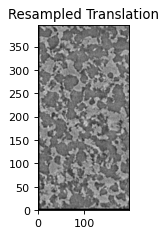

In [8]:
translation_test = sitk.TranslationTransform(dimension)
translation_test.SetParameters((0.1, -2.9000000000000004, -3.0)) #put the best transform from above here!!!
translation.SetOffset((0.1, -2.9000000000000004, -3.0)) ##put the best transform from above here!!!
transform_point(translation_test, point)
resampled_test = resample(moving_image_cropped, translation_test)
myshow(resampled_test[0, :, :], 'Resampled Translation')

In [9]:
RMS0_test = (sitk.GetArrayFromImage(resampled_0[2:98, 2:198, 2:398])).astype('uint8')
RMS1_test = (sitk.GetArrayFromImage(resampled_test[2:98, 2:198, 2:398])).astype('uint8')
print(rmsdiff(RMS0_test, RMS1_test))

123.88926450255357


In [10]:
# we have shown that this method improves the registration of the subsequent grayscale images onto the binary
# i.e because the RMSE is less after the translation
# now we loop the volumes through the above code in order to apply to the whole set
for x in range(1, 17):
    initial_transform = sitk.CenteredTransformInitializer(fixed_image_cropped, 
                                                      moving_image_cropped, 
                                                      sitk.Euler3DTransform(), 
                                                      sitk.CenteredTransformInitializerFilter.GEOMETRY)
    registration_method = sitk.ImageRegistrationMethod()
    registration_method.SetMetricAsMeanSquares()
    registration_method.SetMetricSamplingStrategy(registration_method.RANDOM)
    registration_method.SetMetricSamplingPercentage(0.01)
    registration_method.SetInterpolator(sitk.sitkNearestNeighbor)  #This is the least computationally demanding interpolator 
    registration_method.SetOptimizerAsExhaustive(numberOfSteps=[0,0,0,30,30,30], stepLength = 0.1) 
    registration_method.SetOptimizerScales([1,1,1,1,1,1])
    moving_image = sitk.ReadImage("E:/paper_2/Volumes_Bare/Registration_vol_bare/TiffSaver-reg_B%d.tif"%(x), sitk.sitkFloat32)
    moving_image_cropped = moving_image[:, :, :]
    registration_method.SetInitialTransform(initial_transform, inPlace=True)
    registration_method.Execute(fixed_image_cropped, moving_image_cropped)
    print('best transformation %d: '%(x) + str(initial_transform.GetParameters()))

best transformation 1: (0.0, 0.0, 0.0, 2.0, -1.7000000000000002, 2.9000000000000004)
best transformation 2: (0.0, 0.0, 0.0, 2.6, -0.9, -1.2000000000000002)
best transformation 3: (0.0, 0.0, 0.0, 1.7000000000000002, -0.8, -2.9000000000000004)
best transformation 4: (0.0, 0.0, 0.0, -0.5, 2.3000000000000003, -0.1)
best transformation 5: (0.0, 0.0, 0.0, 1.4000000000000001, -1.5, 0.8)
best transformation 6: (0.0, 0.0, 0.0, 3.0, -0.5, 2.0)
best transformation 7: (0.0, 0.0, 0.0, 0.8, 1.6, -1.6)
best transformation 8: (0.0, 0.0, 0.0, 1.7000000000000002, -2.5, 2.6)
best transformation 9: (0.0, 0.0, 0.0, 2.6, 1.2000000000000002, 0.4)
best transformation 10: (0.0, 0.0, 0.0, 0.4, 2.9000000000000004, -0.9)
best transformation 11: (0.0, 0.0, 0.0, 0.30000000000000004, 1.5, -0.8)
best transformation 12: (0.0, 0.0, 0.0, 0.6000000000000001, -2.5, 3.0)
best transformation 13: (0.0, 0.0, 0.0, 2.5, 0.4, 3.0)
best transformation 14: (0.0, 0.0, 0.0, 0.8, 2.4000000000000004, 1.7000000000000002)
best transform

In [7]:
#Ok! Let's now apply the translations to the data set

from __future__ import print_function
import SimpleITK as sitk
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from ipywidgets import interact, fixed

dimension = 3
def resample(image, transform):
    # Output image Origin, Spacing, Size, Direction are taken from the reference
    # image in this call to Resample
    reference_image = image
    interpolator = sitk.sitkNearestNeighbor
    default_value = 0
    return sitk.Resample(image, reference_image, transform,
                         interpolator, default_value)

#had to crop and save some smaller volumes to stop mem errors
#import imageio as io
#for x in range(1, 17):
    #imga = io.volread('E:/paper_2/Volumes_Bare/TiffSaver-tomo_B%d.tif'%(x))[:1055, :, :]
    #imgb = io.volread('E:/paper_2/Volumes_Bare/TiffSaver-tomo_B%d.tif'%(x))[1055:, :, :]
    #io.volwrite('E:/paper_2/Volumes_Bare/TiffSaver-tomo_B%d_a.tif', imga, format='tiff')
    #io.volwrite('E:/paper_2/Volumes_Bare/TiffSaver-tomo_B%d_b.tif', imgb, format='tiff')

#make lists
#these params where calculated above from the registration process but with the inital transform added into the params
#this initial transform is from the cropping process and not the initial tranform from the reg above

param_1 = (2.0, -1.7000000000000002, 2.9000000000000004)
param_2 = (2.6, -0.9, -1.2000000000000002)
param_3 = (1.7000000000000002, -0.8, -2.9000000000000004)
param_4 = (-0.5, 2.3000000000000003, -0.1)
param_5 = (1.4000000000000001, -1.5, 0.8)
param_6 = (3.0, -0.5, 2.0)
param_7 = (0.8, 1.6, -1.6)
param_8 = (1.7000000000000002, -2.5, 2.6)
param_9 = (2.6, 1.2000000000000002, 0.4)
param_10 = (0.4, 2.9000000000000004, -0.9)
param_11 = (0.30000000000000004, 1.5, -0.8)
param_12 = (0.6000000000000001, -2.5, 3.0)
param_13 = (2.5, 0.4, 3.0)
param_14 = (0.8, 2.4000000000000004, 1.7000000000000002)
param_15 = (2.1, 3.0, 1.3)
param_16 = (3.0, -0.7000000000000001, 1.1)

parameters = [param_1, param_2, param_3, param_4, param_5, param_6, param_7, param_8,
              param_9, param_10, param_11, param_12, param_13, param_14, param_15, param_16]
resampled_list = ['r_1', 'r_2', 'r_3', 'r_4', 'r_5', 'r_6', 'r_7', 'r_8', 'r_9', 'r_10', 'r_11', 'r_12',
                  'r_13', 'r_14', 'r_15', 'r_16']

for x in range(9, 16):
    image = sitk.ReadImage("E:/paper_2/Volumes_Bare/TiffSaver-tomo_B%d_b.tif"%(x+1), sitk.sitkFloat32)
    translation = sitk.TranslationTransform(dimension)
    translation.SetParameters(parameters[x])
    translation.SetOffset(parameters[x])
    resampled_list[x] = resample(image, translation)

In [8]:
import imageio as io
#now save these for future segmentation
for z in range(9, 16):
    io.volsave('E:/paper_2/Volumes_Bare/Registered_vols/TiffSaver-tomo_B%d_b.tif'%(z+1), 
               sitk.GetArrayFromImage(resampled_list[z]).astype(np.uint8), format='tiff')